In [1]:
import sys
sys.path.append('/home/cara/Documents/reddit_analysis_code')
import numpy as np
import pandas as pd
from reddit_dataclass import RedditData as reddit
import pickle
import matplotlib.pyplot as plt

In [2]:
# first perform sentiment analysis using sentiment_analysis.py

In [3]:
sentiment_datasets = pickle.load(open('sentiment_datasets.p', 'rb'))

In [4]:
datasets_author_counts = {}
for key in sentiment_datasets:
    datasets_author_counts[key] = sentiment_datasets[key].group_by_col('author')

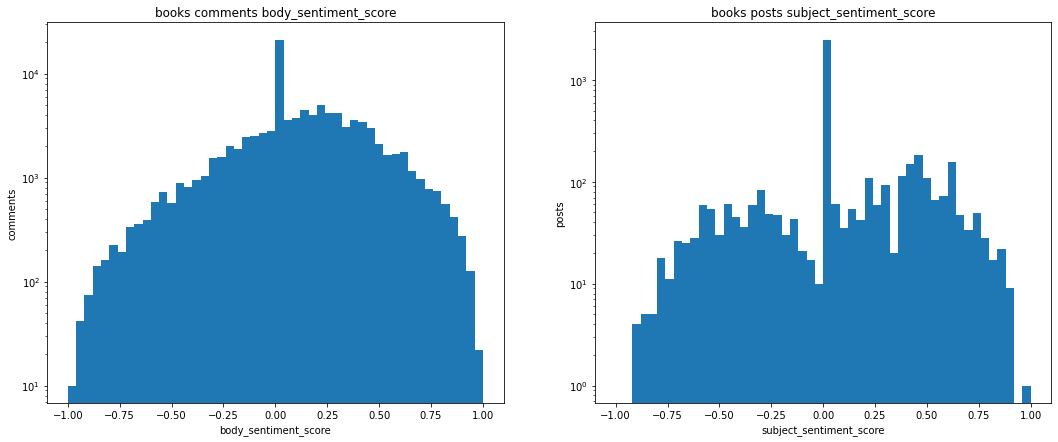

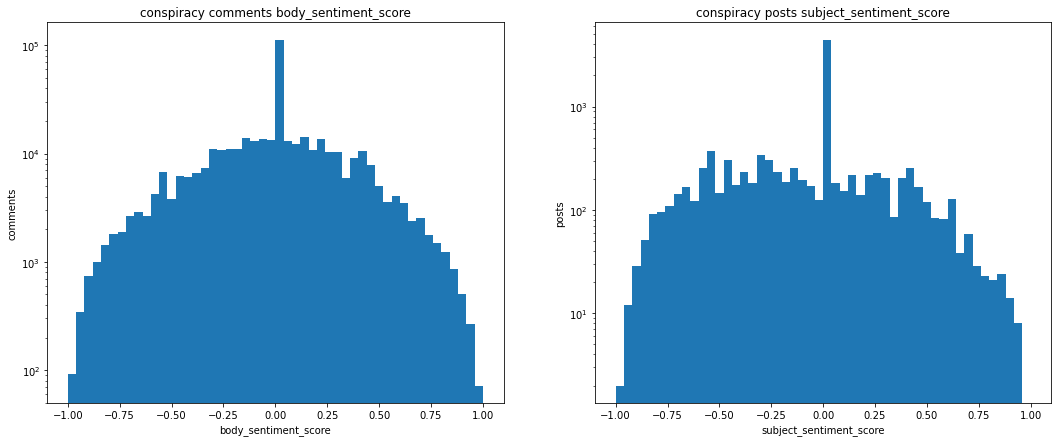

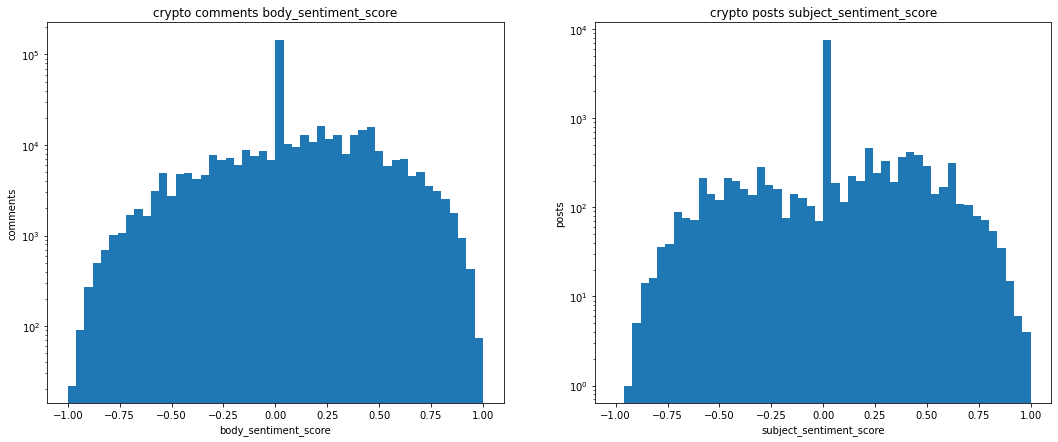

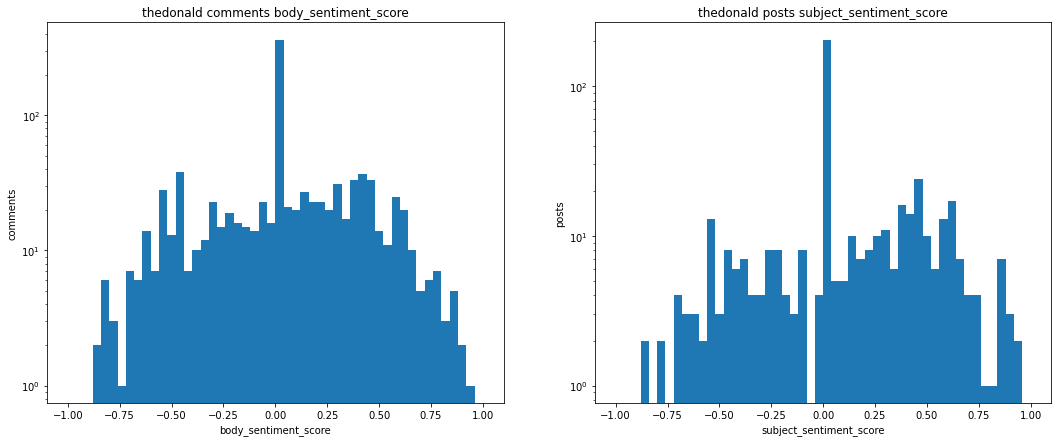

In [5]:
for key in sentiment_datasets:
    activities = {
        'comments': sentiment_datasets[key].comments,
        'posts': sentiment_datasets[key].posts,
        }
    activity_sentiment_lookup = {
        'comments': 'body_sentiment_score',
        'posts': 'subject_sentiment_score'
    }

    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    i = 0
    for activity_key in activities:
        activities[activity_key][activity_sentiment_lookup[activity_key]].hist(ax=axes[i], grid=False, log=True, bins=50, range=(-1, 1))
        axes[i].set_title(f"{key} {activity_key} {activity_sentiment_lookup[activity_key]}")
        axes[i].set_xlabel(f"{activity_sentiment_lookup[activity_key]}")
        axes[i].set_ylabel(f"{activity_key}")
        i += 1
        
    plt.show()

In [10]:
# check neutrals
folder = 'neutral_sentiment_activities'
for key in sentiment_datasets:
    sentiment_datasets[key].comments[sentiment_datasets[key].comments.body_sentiment_score == 0].to_csv(f'{folder}/{key}_comments.csv', index=False)
    sentiment_datasets[key].posts[sentiment_datasets[key].posts.subject_sentiment_score == 0].to_csv(f'{folder}/{key}_posts.csv', index=False)

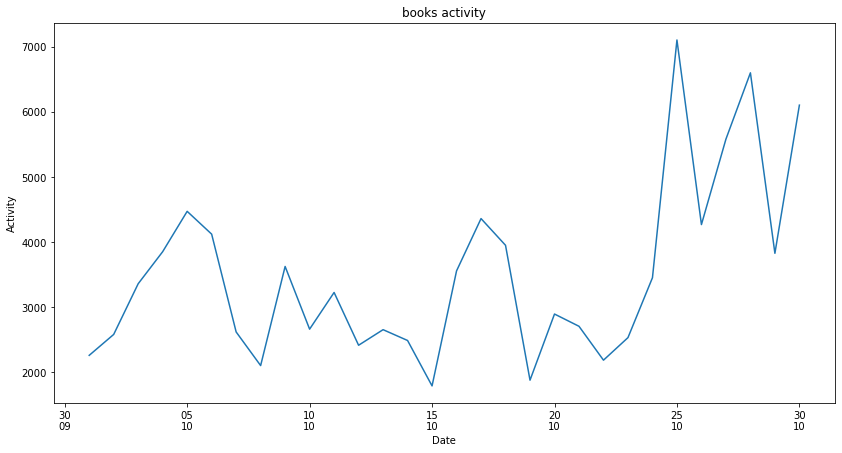

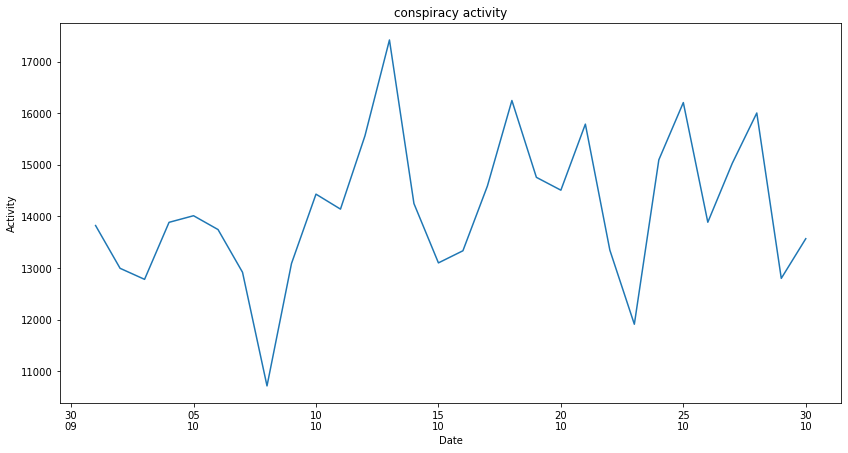

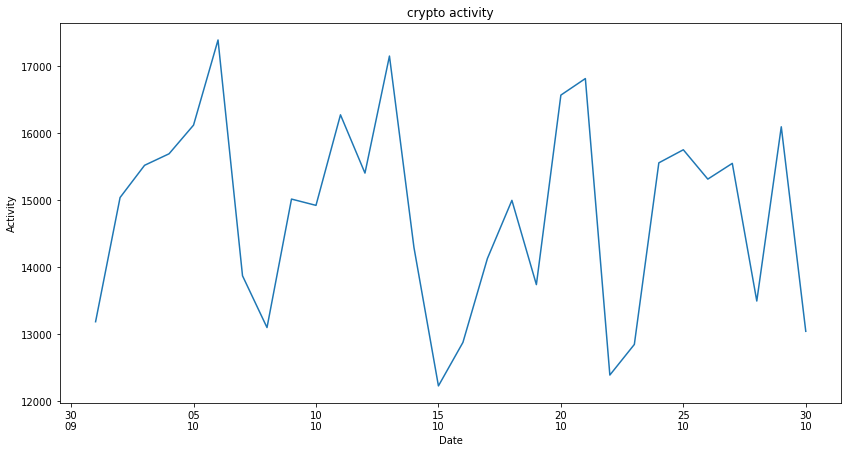

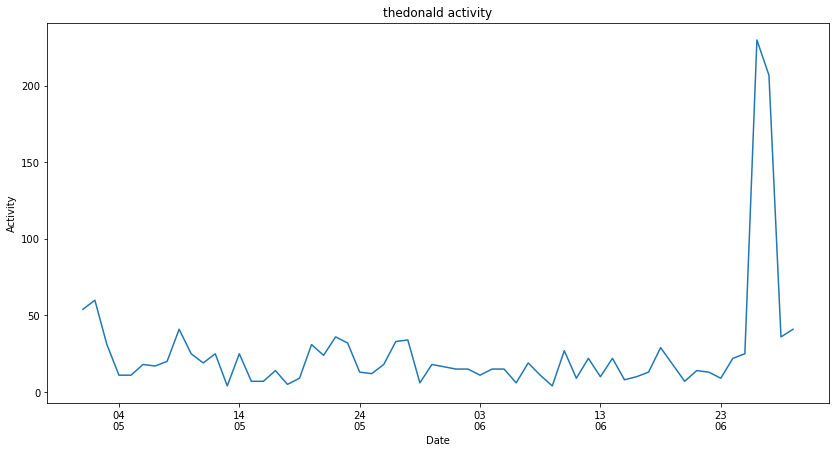

In [8]:
for key in sentiment_datasets:
    activity_over_time = sentiment_datasets[key].group_by_col('date')

    fig, ax = plt.subplots(1, 1, figsize=(14,7))
    sentiment_datasets[key].plot_over_time(activity_over_time.counts, f'Activity', activity_over_time.date, ax=ax, incl_important_dates=False, title=f'{key} activity')
    plt.show()

In [ ]:
# change timezone to EDT timezone - add this to reddit_dataclass?